# Assignment 1 - Exercise two: Identifying objects from images

In [29]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [30]:
# load dataset CIFAR-10 of color images of objects (32x32x3 pixels)
# 10 categories ob objects
# 50k images in training set (x_train, y_train)
# 10k in test set (x_test, y_test)
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [31]:
# rescale to values between zero and one by dividing by 255
x_train = x_train/255
x_test = x_test/255

#already has the right dimensions for keras input
print("shape of the training images:", x_train.shape)

#convert training and test labels to categorial variables 
y_train = keras.utils.to_categorical(y_train, 10) # 10 classes 1 for each object
y_test = keras.utils.to_categorical(y_test, 10)

shape of the training images: (50000, 32, 32, 3)


In [36]:
# convolutional model with two layers
model = keras.Sequential()

# 2 convolutional layers
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
                              activation="relu", input_shape=(32, 32, 3), padding = "same"))
          
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
                             activation="relu"))

# pooling to decrease dimensions  
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))      
model.add(keras.layers.Dropout(rate=0.25)) #dropout of 25%

## add the same layers again without input shape
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
                              activation="relu", padding = "same"))#32 filters in the first layer
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
                              activation="relu"))

# pooling the data 2nd time
model.add(keras.layers.MaxPool2D(pool_size=(2, 2))) # pooling to decrease dimensions        
model.add(keras.layers.Dropout(rate=0.25)) # again add dropout
            
#flatten to one dimension
model.add(keras.layers.Flatten())
# full Dense layer
model.add(keras.layers.Dense(512, activation="relu"))
# ADD Dropout of 0.5
model.add(keras.layers.Dropout(rate=0.5))
#Output layer with 10 units
model.add(keras.layers.Dense(10, activation="softmax")) 
#compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=0.0001, decay=1e-6), 
              metrics='accuracy')

# fit the model
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test), shuffle = True)

model.summary()

Epoch 1/20
1563/1563 [==============================] - 97s 62ms/step - loss: 1.8573 - accuracy: 0.3116 - val_loss: 1.5855 - val_accuracy: 0.4236
Epoch 2/20
1563/1563 [==============================] - 94s 60ms/step - loss: 1.5626 - accuracy: 0.4310 - val_loss: 1.4197 - val_accuracy: 0.4869
Epoch 3/20
1563/1563 [==============================] - 93s 60ms/step - loss: 1.4329 - accuracy: 0.4853 - val_loss: 1.3156 - val_accuracy: 0.5278
Epoch 4/20
1563/1563 [==============================] - 95s 61ms/step - loss: 1.3441 - accuracy: 0.5212 - val_loss: 1.2456 - val_accuracy: 0.5557
Epoch 5/20
1563/1563 [==============================] - 95s 61ms/step - loss: 1.2740 - accuracy: 0.5454 - val_loss: 1.1998 - val_accuracy: 0.5775
Epoch 6/20
1563/1563 [==============================] - 93s 60ms/step - loss: 1.2164 - accuracy: 0.5673 - val_loss: 1.1233 - val_accuracy: 0.6045
Epoch 7/20
1563/1563 [==============================] - 93s 60ms/step - loss: 1.1650 - accuracy: 0.5894 - val_loss: 1.0725 -

## about decay
Having fewer parameters is only one way of preventing our model from getting overly complex. But it is actually a very limiting strategy. More parameters mean more interactions between various parts of our neural network. And more interactions mean more non-linearities. These non-linearities help us solve complex problems. However, we don’t want these interactions to get out of hand. Hence, what if we penalize complexity. We will still use a lot of parameters, but we will prevent our model from getting too complex. This is how the idea of weight decay came up.
One way to penalize complexity, would be to add all our parameters (weights) to our loss function. Well, that won’t quite work because some parameters are positive and some are negative. So what if we add the squares of all the parameters to our loss function. We can do that, however it might result in our loss getting so huge that the best model would be to set all the parameters to 0.To prevent that from happening, we multiply the sum of squares with another smaller number. This number is called weight decay.

## about padding
An alternative approach to applying a filter to an image is to ensure that each pixel in the image is given an opportunity to be at the center of the filter.
In Keras, this is specified via the “padding” argument on the Conv2D layer, which has the default value of ‘valid‘ (no padding). This means that the filter is applied only to valid ways to the input.
The ‘padding‘ value of ‘same‘ calculates and adds the padding required to the input image (or feature map) to ensure that the output has the same shape as the input.

In [38]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("loss of Model:", loss)
print("accuracy of Model:", accuracy)

loss of Model: 0.7990351915359497
accuracy of Model: 0.7217000126838684


### Question 17: 
Plot the training history and show it to your teacher

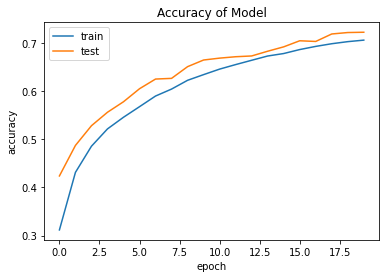

In [40]:
# Question 17
# summarize history for accuracy Model 4
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Question 18:
Discuss with your group, then describe to your teacher, how the training history differs from the convolutional model for digit recognition and why.

Answer 18:
The model is a lot more complex with added layers and dropouts. Another big change is the difference in learning rate as this model uses a learning rate of 0.001 while the previous model used a lr of 1 and therefore made a lot bigger changes. As one can see in the plot above, the accuracy of the model doesn't jump as high after the first epoch but continues to improve due to the smaller learning rate. The test accuracy is higher than the training accuracy but both are still rather low.

### Question 19:
Discuss with your group, then describe to your teacher, how the time taken for each training epoch differs from the convolutional model for digit recognition. Give several factors that may contribute to this difference.

Answer 19:
1. It took a lot longer for each epoch to run as the model is much more complex and includes more layers. 
This might be due to:
- learning rate (0.0001 vs. 1 in the convolutional model)
- number of layers in the model (12 layers vs. 8 layers in the convolutional model)
- optimizer (

*Adadelta*: Instead of accumulating all previously squared gradients, Adadelta limits the window of accumulated past gradients to some fixed size w. In this exponentially moving average is used rather than the sum of all the gradients.

*RMSprop*: The centered version additionally maintains a moving average of the gradients, and uses that average to estimate the variance.
